<h2> Survival Analysis

<h3>1. Kaplan-Meier Fitter

In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
from lifelines import KaplanMeierFitter

In [10]:
df = pd.read_csv('/Users/dr.shivambhatnagar/Desktop/github_python/Diabetes_Dataset_Cleaned.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300 entries, 0 to 299
Data columns (total 30 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   ParticipantID         300 non-null    object 
 1   TreatmentGroup        300 non-null    int64  
 2   RandomizationDate     300 non-null    object 
 3   StudySite             300 non-null    int64  
 4   Age                   300 non-null    int64  
 5   Gender                300 non-null    int64  
 6   BMI                   300 non-null    float64
 7   DiabetesDuration      300 non-null    int64  
 8   SmokingStatus         300 non-null    int64  
 9   EducationLevel        300 non-null    int64  
 10  Complications         300 non-null    int64  
 11  BaselineHbA1c         300 non-null    float64
 12  BaselineFBS           300 non-null    float64
 13  BaselineWeight        300 non-null    float64
 14  BaselineQoL           300 non-null    int64  
 15  FollowupCompleted     3

In [ ]:
#mapping categorical variables to their respective values
df['TreatmentGroup'] = df['TreatmentGroup'].map({0:'StandardCare',1:'NewMedication'})
df['StudySite'] = df['StudySite'].map({0:'Atlanta',1:'Boston',2:'Chicago',3:'Denver'})
df['Gender'] = df['Gender'].map({0:'Male',1:'Female'})
df['SmokingStatus'] = df['SmokingStatus'].map({0:'Never',1:'Former',2:'Current'})
df['EducationLevel'] = df['EducationLevel'].map({0:'Primary',1:'Secondary',2:'College+'})
df['Complications'] = df['Complications'].map({0:'None',1:'Neuropathy',2:'Retinopathy',3:'Both'})
df['FollowupCompleted'] = df['FollowupCompleted'].map({0:'No',1:'Yes'}) 
df['TargetAchieved'] = df['TargetAchieved'].map({0:'No',1:'Yes'})   
df['PatientSatisfaction'] = df['PatientSatisfaction'].map({0:'Poor',1:'Fair',2:'Good',3:'Excellent'})
df['AdverseEvents'] = df['AdverseEvents'].map({0:'None',1:'Mild',2:'Moderate',3:'Severe'})

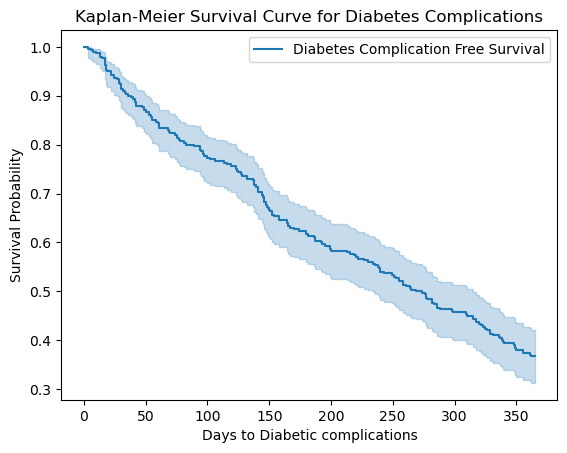

In [12]:
kmf = KaplanMeierFitter()
kmf.fit(durations = df['DaysToComplication'], event_observed = df['ComplicationOccurred'], label = 'Diabetes Complication Free Survival')
kmf.plot_survival_function()
plt.title('Kaplan-Meier Survival Curve for Diabetes Complications')
plt.xlabel('Days to Diabetic complications')
plt.ylabel('Survival Probability')
plt.show()

<h3>2. Comparison between Treatment vs Control (SoC)

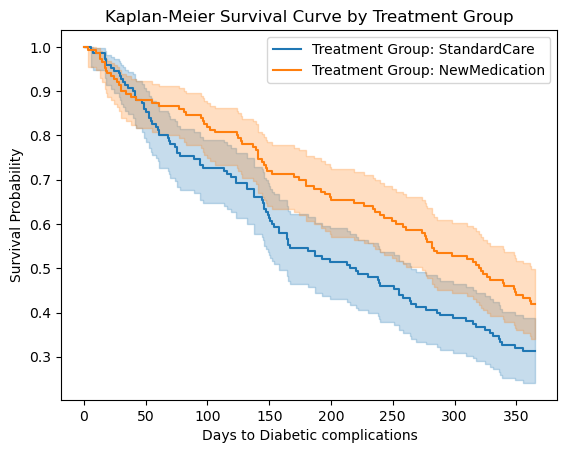

In [14]:

for treatment in df['TreatmentGroup'].unique():
    mask = df['TreatmentGroup'] == treatment
    kmf.fit(durations = df[mask]['DaysToComplication'], 
    event_observed = df[mask]['ComplicationOccurred'],
    label = f'Treatment Group: {treatment}')
    kmf.plot_survival_function()
plt.title('Kaplan-Meier Survival Curve by Treatment Group')
plt.xlabel('Days to Diabetic complications')
plt.ylabel('Survival Probability')
plt.legend()
plt.show()

<h3>3. Cox-Proportional Hazards

In [15]:
from lifelines import CoxPHFitter

<lifelines.CoxPHFitter: fitted with 300 total observations, 110 right-censored observations>
             duration col = 'DaysToComplication'
                event col = 'ComplicationOccurred'
      baseline estimation = breslow
   number of observations = 300
number of events observed = 190
   partial log-likelihood = -997.10
         time fit was run = 2025-12-02 19:18:27 UTC

---
                                coef exp(coef)  se(coef)  coef lower 95%  coef upper 95% exp(coef) lower 95% exp(coef) upper 95%
covariate                                                                                                                       
TreatmentGroup[T.StandardCare]  0.33      1.39      0.15            0.04            0.62                1.04                1.86
Age                             0.00      1.00      0.01           -0.01            0.01                0.99                1.01
Gender[T.Male]                  0.15      1.16      0.15           -0.14            0.45                0.87                1.56
BMI                            -0.01      0.99      0.01           -0.03            0.02                0.97                1.02
SmokingStatus[T.Former]        -0.02      0.98      0.21           -0.43            0.39                0.65                1.47
SmokingStatus[T.Never]         -0.36      0.70      0.20           -0.74            0.03                0.47                1.03
EducationLevel[T.Primary]       0.12      1.13      0.21           -0.29            0.53                0.75                1.70
EducationLevel[T.Secondary]    -0.13      0.88      0.18           -0.49            0.23                0.61                1.26
Complications[T.Neuropathy]    -0.34      0.71      0.29           -0.90            0.23                0.41                1.25
Complications[T.None]          -0.36      0.70      0.26           -0.87            0.15                0.42                1.17
Complications[T.Retinopathy]   -0.13      0.87      0.31           -0.74            0.47                0.48                1.60

                                cmp to     z    p  -log2(p)
covariate                                                  
TreatmentGroup[T.StandardCare]    0.00  2.21 0.03      5.20
Age                               0.00  0.87 0.38      1.39
Gender[T.Male]                    0.00  1.00 0.32      1.66
BMI                               0.00 -0.56 0.58      0.80
SmokingStatus[T.Former]           0.00 -0.11 0.91      0.13
SmokingStatus[T.Never]            0.00 -1.79 0.07      3.76
EducationLevel[T.Primary]         0.00  0.59 0.56      0.84
EducationLevel[T.Secondary]       0.00 -0.71 0.48      1.06
Complications[T.Neuropathy]       0.00 -1.18 0.24      2.07
Complications[T.None]             0.00 -1.37 0.17      2.56
Complications[T.Retinopathy]      0.00 -0.43 0.66      0.59
---
Concordance = 0.58
Partial AIC = 2016.21
log-likelihood ratio test = 14.96 on 11 df
-log2(p) of ll-ratio test = 2.44

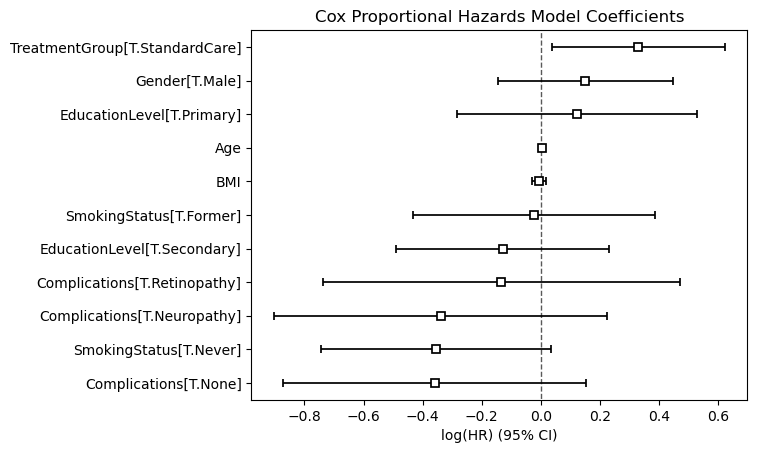

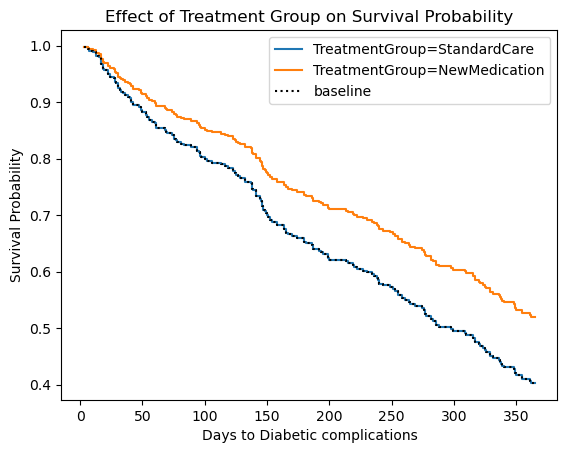

In [ ]:
cph = CoxPHFitter()
cph.fit(df = df, duration_col = 'DaysToComplication',
        event_col = 'ComplicationOccurred',
        formula = 'TreatmentGroup + Age + Gender + BMI + SmokingStatus + EducationLevel + Complications')
cph.print_summary()
cph.plot()
plt.title('Cox Proportional Hazards Model Coefficients')

cph.plot_partial_effects_on_outcome(
    covariates = 'TreatmentGroup',
    values = df['TreatmentGroup'].unique(),
    plot_baseline = True
)
plt.title('Effect of Treatment Group on Survival Probability')
plt.xlabel('Days to Diabetic complications')
plt.ylabel('Survival Probability')
plt.show()